In [94]:
os.chdir('f:\\DOCUMENTS\\Project\\STORES_SALES_PREDICTION')

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from logger import logging
from exception import CustomException

In [96]:
from data_transformation import Data_Transformer, initiate_data_transform
train_data_path, test_data_path = initiate_data_transform()
processed_train_data_path, processed_test_data_path = Data_Transformer(train_data_path, test_data_path)

f:\DOCUMENTS\Project\STORES_SALES_PREDICTION\data_ingestion.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM train", con=db)
f:\DOCUMENTS\Project\STORES_SALES_PREDICTION\data_ingestion.py:49: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM test", con=db)


In [97]:
df = pd.read_csv(train_data_path)
train_data = pd.read_csv(processed_train_data_path)

In [98]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
8,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
9,FDY07,11.800,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266


In [99]:
df.drop('Item_Identifier',axis=1, inplace=True)

In [100]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7060 entries, 0 to 7059
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           7060 non-null   object 
 2   Item_Visibility            7060 non-null   float64
 3   Item_Type                  7060 non-null   object 
 4   Item_MRP                   7060 non-null   float64
 5   Outlet_Identifier          7060 non-null   object 
 6   Outlet_Establishment_Year  7060 non-null   int64  
 7   Outlet_Size                4650 non-null   object 
 8   Outlet_Location_Type       7060 non-null   object 
 9   Outlet_Type                7060 non-null   object 
 10  Item_Outlet_Sales          7060 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 606.8+ KB


In [102]:
df.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [103]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Breads',
       'Canned', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [104]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store'],
      dtype=object)

In [105]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT045', 'OUT017',
       'OUT046', 'OUT035'], dtype=object)

# EDA for Train Data

In [106]:
df.groupby("Item_Type")["Item_Weight"].mean()

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [107]:
logging.info("Filling the null Values of Item weight")
try:
    mean = df.groupby('Item_Type')['Item_Weight'].mean()
    for i in range(len(mean)):
        c1 = (df['Item_Type']==mean.index[i])&(df['Item_Weight'].isna()==True)
        df['Item_Weight'] = np.select([c1], [mean[i]], df['Item_Weight'])
except ValueError as val:
    logging.exception(val)
    raise CustomException(val, sys)
except KeyError as key:
    logging.exception(key)
    raise CustomException(key, sys)

In [108]:
from statistics import mode
logging.info("Filling null values of Outlet size")
try:
    df['Outlet_Size'].fillna(mode(df['Outlet_Size']),inplace=True)
    logging.info("Filling null values of Outlet size Successful")
except ValueError as val:
    logging.exception(val)
except KeyError as key:
    logging.exception(key)

In [109]:
try:
    logging.info("Replacing the values of Item fat content")
    fat_content = {"low fat": "Low Fat",
                "LF": "Low Fat",
                "reg":"Regular"}
    df["Item_Fat_Content"]= df["Item_Fat_Content"].replace(fat_content)
    logging.info("Replacing the values of Item fat content Successful")
except Exception as e:
    logging.exception(e)
    raise CustomException(e, sys)

In [110]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [111]:
df.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Data Visualization

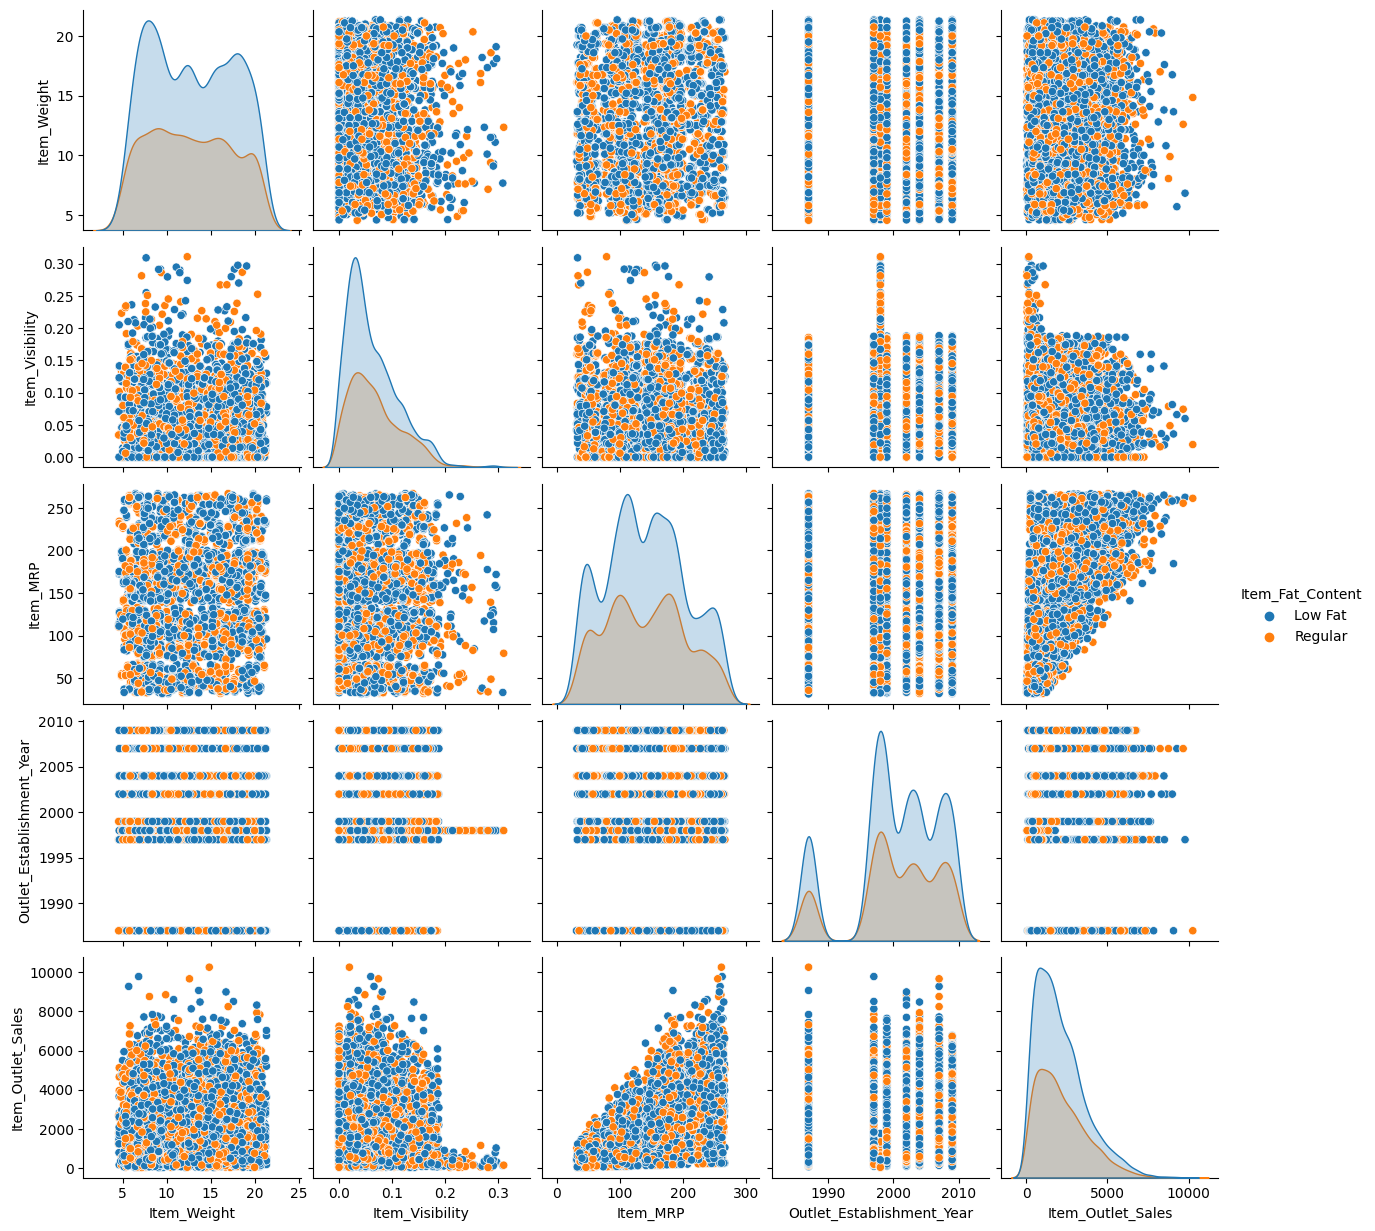

In [112]:
try:
    logging.info("Plotting pairplot of train_data")
    sns.pairplot(df, hue = "Item_Fat_Content")
    logging.info("Plotting pairplot of train_data Successful")
except Exception as e:
    logging.exception(e)
    raise CustomException(e, sys)

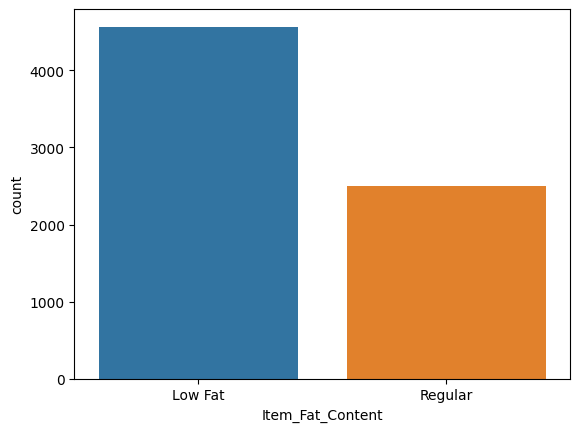

In [113]:
try:
    logging.info("Plotting countplot of Item fat content")
    sns.countplot(x = 'Item_Fat_Content', data = df)
    logging.info("Plotting countplot of Item fat content successful")
except Exception as e:
    logging.exception(e)
    raise CustomException(e, sys)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6648\3578842674.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


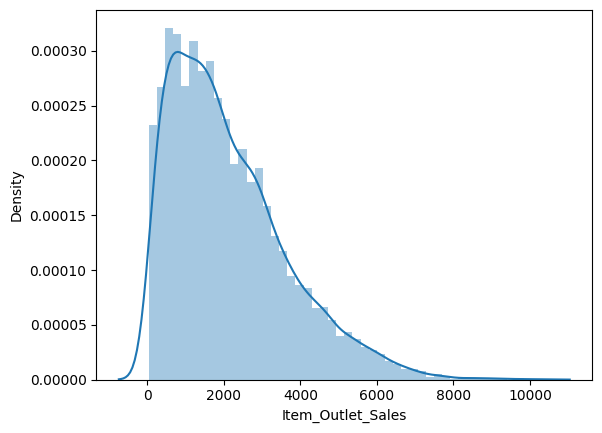

In [114]:
try:
    logging.info("Plotting distplot of Item outlet sales")
    sns.distplot(df['Item_Outlet_Sales'])
    logging.info("Plotting distplot of Item outlet sales successful")
except Exception as e:
    logging.exception(e)
    raise CustomException(e, sys)

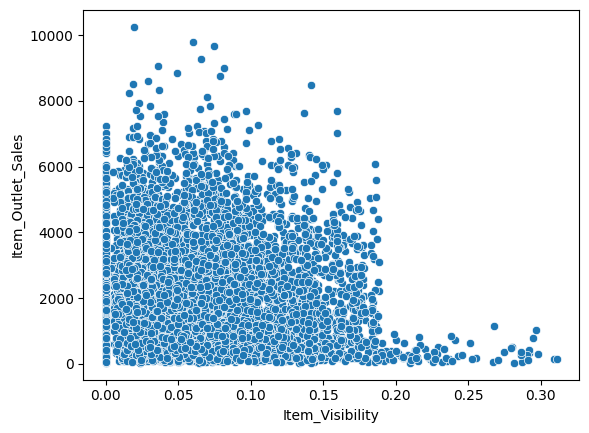

In [115]:
try:
    logging.info("Plotting scatterplot")
    sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df)
    logging.info("Plotting scatterplot successful")
except Exception as e:
    logging.exception(e)
    raise CustomException(e, sys)

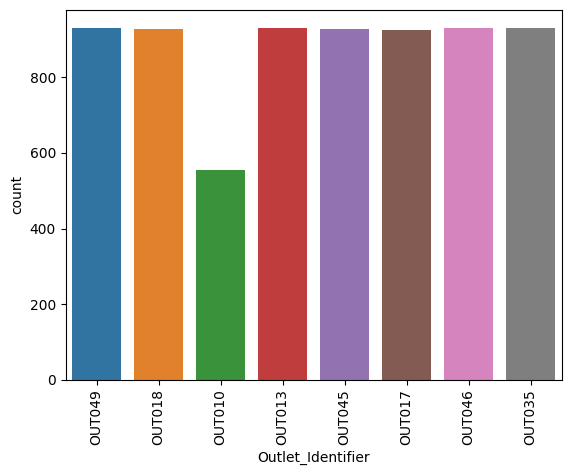

In [116]:
try:
    logging.info("Plotting countplot of outlet identifier")
    sns.countplot(x = 'Outlet_Identifier', data = df)
    plt.xticks(rotation = 90)
    plt.show()
    logging.info("Plotting countplot of outlet identifier successful")
except Exception as e:
    logging.exception(e)
    raise CustomException(e, sys)

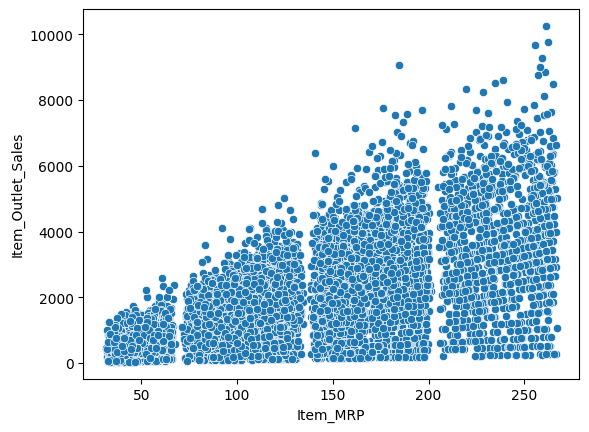

In [117]:
try:
    logging.info("Plotting scatterplot of item MRP with respect to Item outlet sales")
    sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)
    logging.info("Plotting scatterplot of item MRP with respect to Item outlet sales Successful")
except Exception as e:
    logging.exception(e)
    raise CustomException(e, sys)

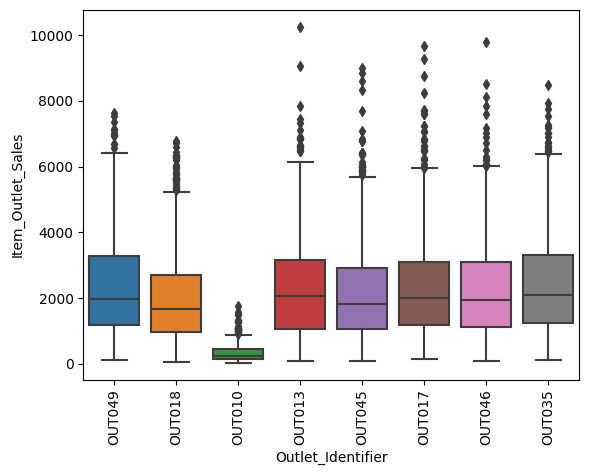

In [118]:
try:
    logging.info("Plotting boxplot")
    sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data =df)
    plt.xticks(rotation = 90)
    plt.show()
    logging.info("Plotting boxplot successful")
except Exception as e:
    logging.exception(e)
    raise CustomException(e, sys)

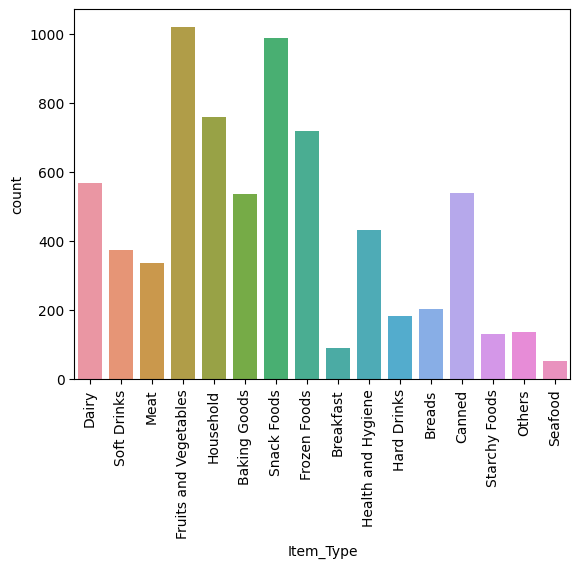

In [119]:
try:
    logging.info("Plotting countplot of Item type")
    sns.countplot(x='Item_Type',data=df)
    plt.xticks(rotation = 90)
    plt.show()
    logging.info("Plotting countplot of Item type successful")
except Exception as e:
    logging.exception(e)
    raise CustomException(e, sys)

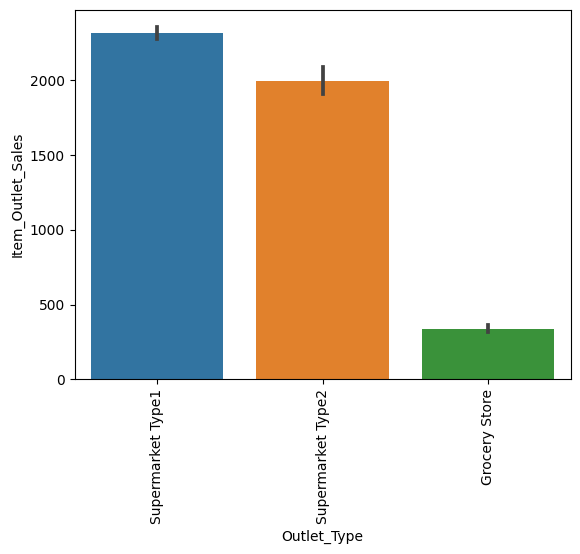

In [120]:
try:
    logging.info("Plotting barplot")
    sns.barplot(y=df['Item_Outlet_Sales'],x=df['Outlet_Type'], data = df)
    plt.xticks(rotation = 90)
    plt.show()
    logging.info("Plotting barplot successful")
except Exception as e:
    logging.exception(e)
    raise CustomException(e, sys)

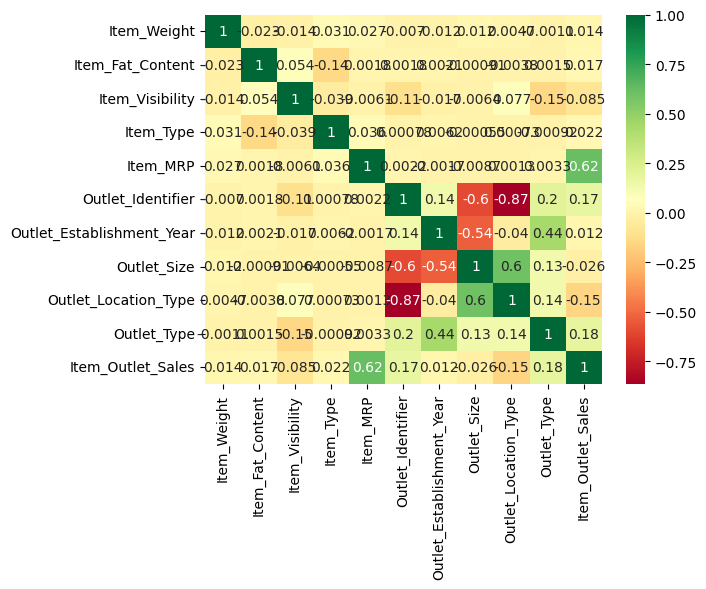

In [125]:
try:
    logging.info("Plotting train_data correlation")
    sns.heatmap(train_data.corr(),annot=True, cmap = "RdYlGn")
    logging.info("Plotting train_data correlation successful")
except Exception as e:
    logging.exception(e)
    raise CustomException(e, sys)

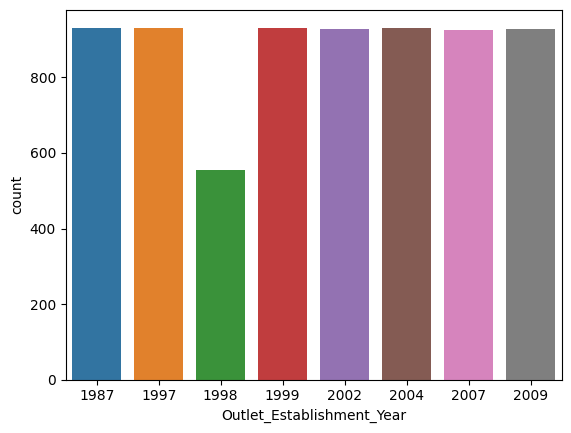

In [122]:
try:
    logging.info("Plotting countplot of outlet establishment year")
    sns.countplot(x="Outlet_Establishment_Year", data = df)
    logging.info("Plotting countplot of outlet establishment year Successful")
except Exception as e:
    logging.exception(e)
    raise CustomException(e, sys)

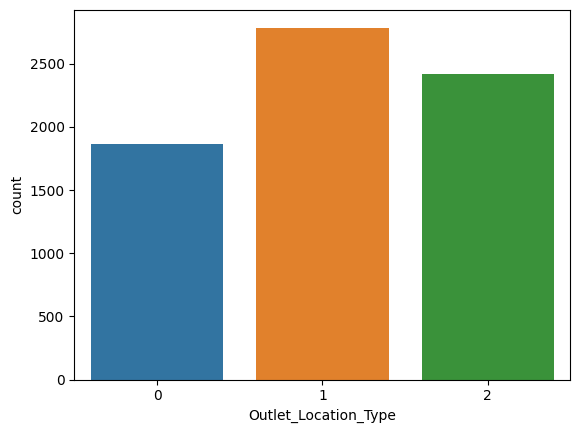

In [123]:
try:
    logging.info("Plotting countplot of outlet location type")
    sns.countplot(x="Outlet_Location_Type", data = train_data)
    logging.info("Plotting countplot of outlet location type Successful")
except Exception as e:
    logging.exception(e)
    raise CustomException(e, sys)

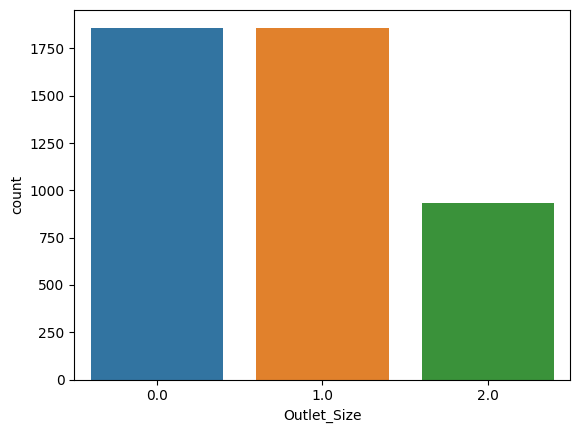

In [124]:
try:
    logging.info("Plotting countplot of outlet size")
    sns.countplot(x="Outlet_Size", data = train_data)
    logging.info("Plotting countplot of outlet size Successful")
except Exception as e:
    logging.exception(e)
    raise CustomException(e, sys)